## Inference

We import the main function from the inference_optimization script and run experiments for all 3 models i.e. inceptionv3, resnet50 and vgg16 for two types of inference optimizations (low resolution optimization and torchscript). Performance results have been visualized.

In [1]:
import argparse
import time
import matplotlib.pyplot as plt
from inference_optimization import main  # Importing the main function from the inference optimization script

In [2]:
import warnings
warnings.filterwarnings("ignore")


inception:
Execution Time (Before Optimization): 0.2894 seconds
Predicted Class Index and Label (Without Optimization): 207 :  Golden Retriever

inception:
Execution Time (With Optimization - Low Resolution): 0.4880 seconds
Predicted Class Index and Label (With Optimization - Low Resolution): 207 :  Golden Retriever

inception:
Execution Time (With Optimization - TorchScript): 1.8789 seconds
Predicted Class Index and Label (With Optimization - TorchScript): 207 :  Golden Retriever


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 124MB/s]



resnet:
Execution Time (Before Optimization): 0.2923 seconds
Predicted Class Index and Label (Without Optimization): 207 :  Golden Retriever

resnet:
Execution Time (With Optimization - Low Resolution): 0.4380 seconds
Predicted Class Index and Label (With Optimization - Low Resolution): 207 :  Golden Retriever

resnet:
Execution Time (With Optimization - TorchScript): 0.8895 seconds
Predicted Class Index and Label (With Optimization - TorchScript): 207 :  Golden Retriever


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:10<00:00, 50.6MB/s]



vgg:
Execution Time (Before Optimization): 0.5214 seconds
Predicted Class Index and Label (Without Optimization): 207 :  Golden Retriever

vgg:
Execution Time (With Optimization - Low Resolution): 4.7710 seconds
Predicted Class Index and Label (With Optimization - Low Resolution): 207 :  Golden Retriever

vgg:
Execution Time (With Optimization - TorchScript): 1.0560 seconds
Predicted Class Index and Label (With Optimization - TorchScript): 207 :  Golden Retriever


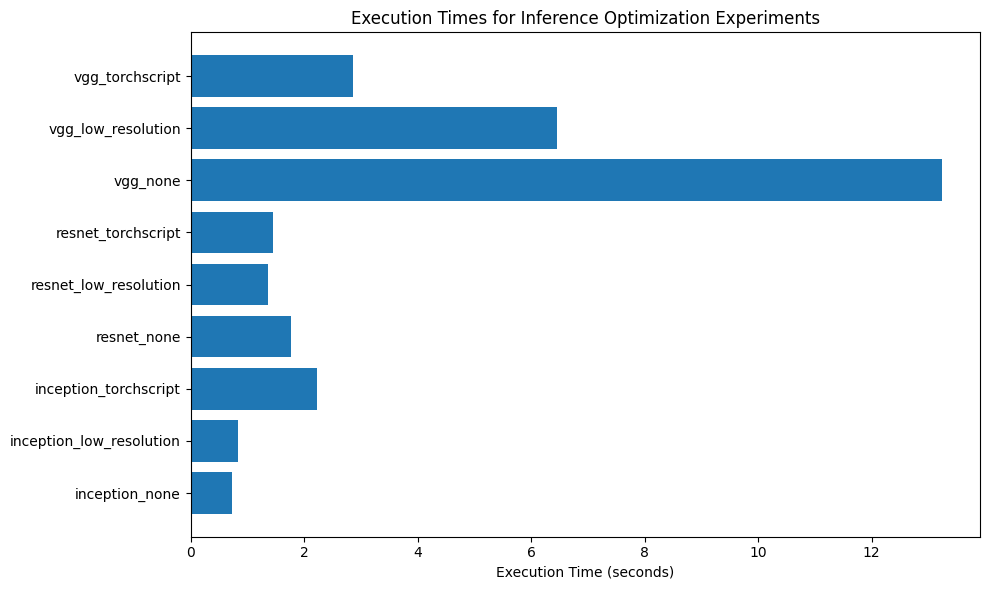

In [4]:
# Function to run experiments with different parameters
def run_experiments(models, images, optimizations):
    execution_times = []
    for model in models:
        for image in images:
            for opt in optimizations:
                # Run the main function with different parameters
                args = argparse.Namespace(model=model, image=image, optimization=opt)
                start_time = time.time()
                main(args)
                end_time = time.time()
                execution_time = end_time - start_time
                execution_times.append((model, image, opt, execution_time))
    return execution_times


# Function to visualize the results
def visualize_results(execution_times):
    # Extracting data for visualization
    models = [item[0] for item in execution_times]
    images = [item[1] for item in execution_times]
    optimizations = [item[2] for item in execution_times]
    times = [item[3] for item in execution_times]

    # Plotting execution times
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(times)), times, align='center')
    plt.yticks(range(len(times)), [f'{model}_{opt}' for model, image, opt in zip(models, images, optimizations)])
    plt.xlabel('Execution Time (seconds)')
    plt.title('Execution Times for Inference Optimization Experiments')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    models = ['inception', 'resnet', 'vgg']
    images = ['data/dog.jpeg']
    optimizations = ['none', 'low_resolution', 'torchscript']

    # Run experiments
    execution_times = run_experiments(models, images, optimizations)

    # Visualize results
    visualize_results(execution_times)


In [5]:
##roboflow model inference

In [6]:
!pip install inference-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.6 MB/s eta 0:00:00


In [7]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://classify.roboflow.com",
    api_key="QKSEJNiffWgiNcwec2Sk"
)

result = CLIENT.infer('data/wildfire.jpeg', model_id="fireclassify-iuwtq/1")

In [8]:
result

{'time': 0.14861238699995738,
 'image': {'width': 408, 'height': 612},
 'predictions': {'burned': {'confidence': 0.34259530901908875},
  'fireandsmoke': {'confidence': 0.6067293882369995},
  'normal': {'confidence': 0.2120293378829956}},
 'predicted_classes': ['fireandsmoke']}